In [1]:
#Reading input
import cv2 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image=np.array(Image.open(r"/home/snucse/Desktop/SET-11/image_2.tif"))

In [3]:
image.shape

(1000, 1000, 3)

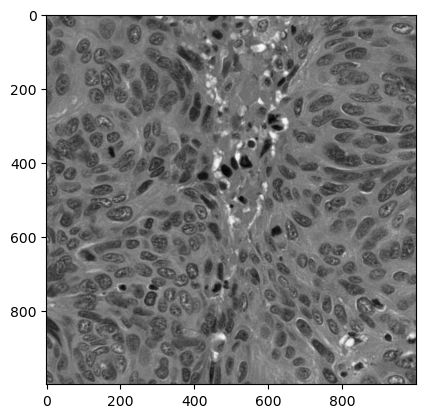

In [4]:
#gray scale conversion
gray_img=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img,cmap="gray")

In [5]:
#Highlighting
# Plot the image
def imshow(img, ax=None):
    if ax is None:
        ret, encoded = cv2.imencode(".jpg", img)
        display(Image(encoded))
    else:
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

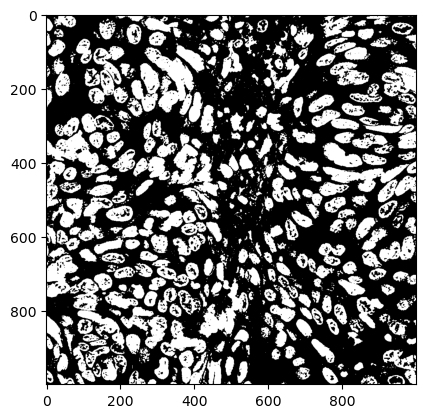

In [6]:
ret, bin_img = cv2.threshold(gray_img,
                             0, 255, 
                             cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(bin_img,cmap="gray")

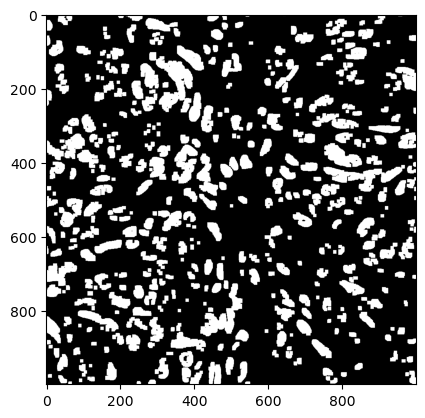

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_img = cv2.morphologyEx(bin_img, 
                           cv2.MORPH_OPEN,
                           kernel,
                           iterations=4)
plt.imshow(bin_img,cmap="gray")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


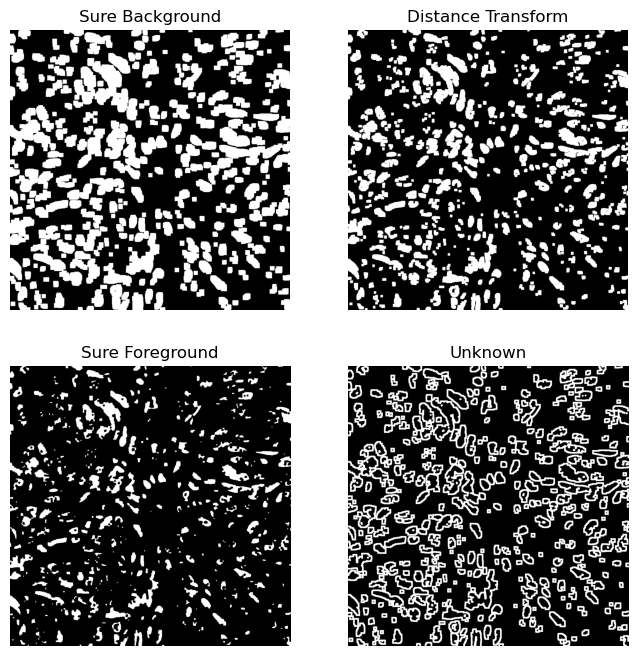

In [8]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# sure background area
sure_bg = cv2.dilate(bin_img, kernel, iterations=3)
imshow(sure_bg, axes[0,0])
axes[0, 0].set_title('Sure Background')

# Distance transform
dist = cv2.distanceTransform(bin_img, cv2.DIST_L2, 5)
imshow(dist, axes[0,1])
axes[0, 1].set_title('Distance Transform')

#foreground area
ret, sure_fg = cv2.threshold(dist, 0.15* dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8) 
imshow(sure_fg, axes[1,0])
axes[1, 0].set_title('Sure Foreground')

# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown, axes[1,1])
axes[1, 1].set_title('Unknown')

plt.show()



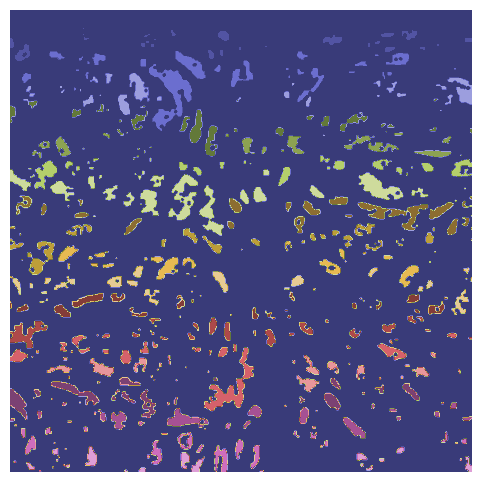

In [9]:
ret, markers = cv2.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

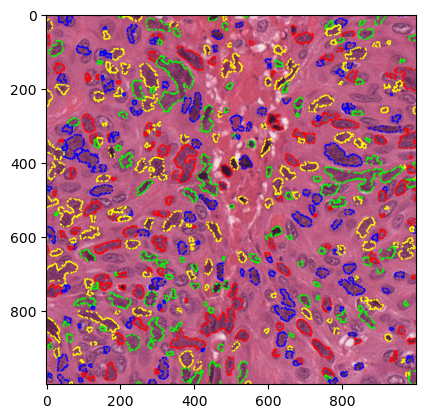

In [10]:
# watershed Algorithm
import random
markers = cv2.watershed(image, markers)
colors=[(255,0,0),(0,255,0),(0,0,255),(255,255,0)]
labels = np.unique(markers)
nuclei = []
for label in labels[2:]: 

# Create a binary image in which only the area of the label is in the foreground 
#and the rest of the image is in the background 
    target = np.where(markers == label, 255, 0).astype(np.uint8)

# Perform contour extraction on the created binary image
    contours, hierarchy = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    nuclei.append(contours[0])

# Draw the outline
for i in nuclei:
    res = cv2.drawContours(image, i, -1, color=random.choice(colors), thickness=3)
plt.imshow(res)

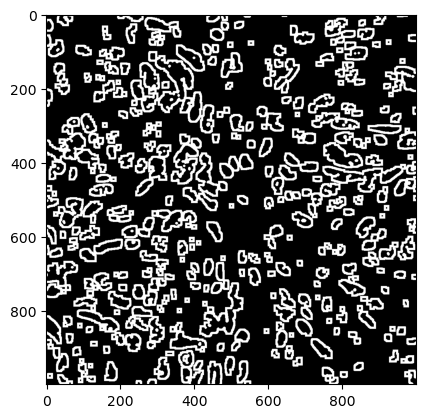

In [11]:
#masking
mask=cv2.cvtColor(unknown,cv2.COLOR_GRAY2RGB)
plt.imshow(mask)

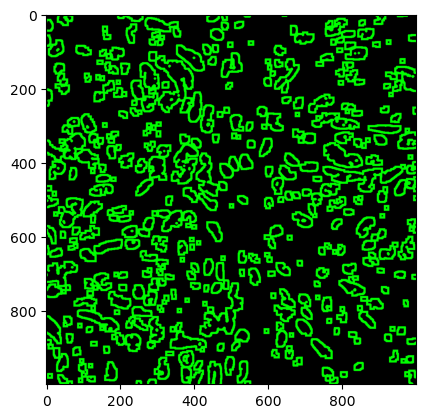

In [12]:
mask[:,:,0]=0
mask[:,:,2]=0
plt.imshow(mask)

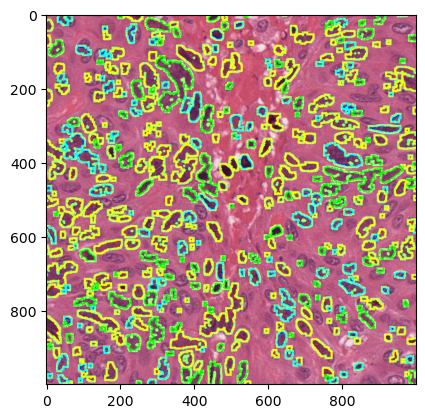

In [13]:
masked = cv2.bitwise_or(image, mask)
plt.imshow(masked)